<a href="https://colab.research.google.com/github/mehjabeenalam-ux/REC-2-Machine-Learning/blob/main/OpenCV_YOLO_Beginner_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV and YOLO beginner Level Projects

PIP Installations

In [2]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.4 MB/s eta 0:00:00


Exercise 1: Face Detection on a Photo (OpenCV)
Application: Photo tagging, social media filters, identity verification

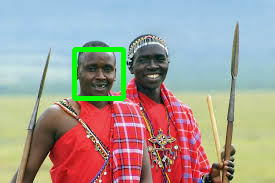

In [11]:
import cv2
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('/content/mm12.jpg')  # Replace with your image path

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Save and show result
cv2.imwrite('faces_detected.jpg', img)
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Bird Detection

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 384x640 1 bird, 317.9ms
Speed: 6.6ms preprocess, 317.9ms inference, 48.5ms postprocess per image at shape (1, 3, 384, 640)


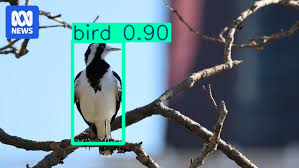

Detected: bird (confidence: 0.90)


In [7]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load YOLO model
model = YOLO('yolo11n.pt')

# Load image
img = cv2.imread('birdie.jpg')
if img is None:
    raise FileNotFoundError("Image not found. Upload 'birdie.jpg'.")

# Detect objects
results = model(img)

# Plot detections
annotated_img = results[0].plot()

# Save and show
cv2.imwrite('bird_detected.jpg', annotated_img)
cv2_imshow(annotated_img)

# Print detected objects
for r in results:
    for box in r.boxes:
        class_name = r.names[int(box.cls)]
        conf = float(box.conf)
        print(f"Detected: {class_name} (confidence: {conf:.2f})")

Exercise 2: Object Detection on an Image with YOLO11

- Application: Inventory checking, photo analysis, security snapshots


image 1/1 /content/objects.jpg: 480x640 4 bowls, 2 vases, 110.8ms
Speed: 3.0ms preprocess, 110.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


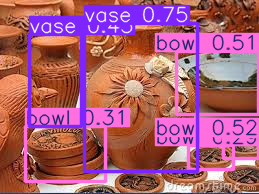

Detected: vase (confidence: 0.75)
Detected: bowl (confidence: 0.52)
Detected: bowl (confidence: 0.51)
Detected: vase (confidence: 0.43)
Detected: bowl (confidence: 0.31)
Detected: bowl (confidence: 0.29)


In [13]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load YOLO11 nano model (fast & lightweight)
model = YOLO('yolo11n.pt')

# Load your image
img_path = '/content/objects.jpg'  # Replace with your image
results = model(img_path)

# Show results with bounding boxes
annotated_img = results[0].plot()

# Save the output
cv2.imwrite('yolo_detected.jpg', annotated_img)

# Optional: Show in window
cv2_imshow(annotated_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Print detected objects
for r in results:
    for box in r.boxes:
        class_name = r.names[int(box.cls)]
        conf = float(box.conf)
        print(f"Detected: {class_name} (confidence: {conf:.2f})")

Exercise 3: Color Detection on an Image (e.g., Find Red Objects)

- Application: Quality control (detect defects), product sorting

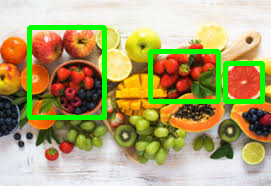

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/fruits.jpg')  # Replace with your image

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Red color range (two ranges because red wraps around hue)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = mask1 + mask2

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes
for cnt in contours:
    if cv2.contourArea(cnt) > 500:  # ignore small noise
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)

cv2.imwrite('red_objects_detected.jpg', img)
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Exercise 4: Edge Detection on an Image (Canny)
- Application: Image preprocessing for medical scans, robotics, art filters

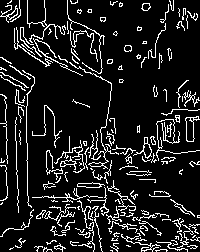

In [20]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/vangogh.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

# Save and show
cv2.imwrite('edges.jpg', edges)
cv2_imshow(edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Exercise 5: Object Counting from Pre-recorded Video with YOLO

- Application: People counting in stores, vehicle counting on roads

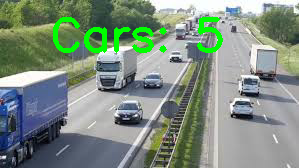

In [28]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('yolo11n.pt')

video_path = '/content/cars.mp4'  # Replace with your video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)

    # Count detected cars (class ID 2 in COCO = 'car')
    car_count = sum(1 for box in results[0].boxes if int(box.cls) == 2)

    # Draw count on frame
    cv2.putText(frame, f'Cars: {car_count}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
# cv2.destroyAllWindows()